<a href="https://colab.research.google.com/github/fbeilstein/machine_learning/blob/master/lecture_04_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas
pandas.__version__

'1.0.5'

In [1]:
#@title Helper Functions

def pandas_to_html(obj, ordering=False):
  import pandas as pd
  if type(obj) == pd.core.series.Series:
    if obj.name != None:
      obj = pd.DataFrame(obj)#, columns=[' '])
    else:
      obj = pd.DataFrame(obj, columns=[' '])
  
  class_name = 'pandas_table'
  if obj.shape[0] > 10:
    class_name += '_long'
  else:
    class_name += '_short'

  if ordering:
    class_name += '_ordered'
  else:
    class_name += '_unordered'


  main_str = '''
  <script src="https://ajax.googleapis.com/ajax/libs/jquery/3.5.1/jquery.min.js"></script>
  <link rel="stylesheet" type="text/css" href="https://cdn.datatables.net/1.10.21/css/jquery.dataTables.css">
  <script type="text/javascript" charset="utf8" src="https://cdn.datatables.net/1.10.21/js/jquery.dataTables.js"></script>
  ''' + obj.to_html(classes=[class_name, 'cell-border']) + '''
  <script>
  $(document).ready( function () {
      $('.pandas_table_long_ordered').DataTable({"autoWidth": false});
      $('.pandas_table_long_ordered').removeClass("pandas_table_long_ordered");
      $('.pandas_table_short_ordered').DataTable({"autoWidth": false, "paging":false, "searching":false, "info":false});
      $('.pandas_table_short_ordered').removeClass("pandas_table_short_ordered");

      $('.pandas_table_long_unordered').DataTable({"autoWidth": false, "ordering":false, "paging":true});
      $('.pandas_table_long_unordered').removeClass("pandas_table_long_unordered");
      $('.pandas_table_short_unordered').DataTable({"autoWidth": false, "paging":false, "searching":false, "info":false, "ordering":false});
      $('.pandas_table_short_unordered').removeClass("pandas_table_short_unordered");
  } );
  </script>
  '''
  return main_str

def display_pandas(obj, ordering=False):
  import IPython
  from google.colab import output
  display(IPython.display.HTML(pandas_to_html(obj, ordering)))

str_style_bigtbl = '''
<style>
.bigtable {
  border-collapse: collapse;
}

.bigtd {
  border: 3px solid #d4d4d3ff;
  min-width:50%;
  min-width:50%;
  height: 30px;
  position: relative; 
  text-align:center; 
  color: #474747;
  font-size:15px;
  font-weight: bolder;
  padding: 19px;
}

</style>
'''

def envelope_tbl(lst):
  result = '<table class="bigtable">\n'
  for row in lst:
    result += '<tr>\n\t'
    for e in row:
      if isinstance(e, dict):
        result += '<td class="bigtd"'
        for key in e:
          if key != 'text':
            result += str(key) + '="' + str(e[key]) + '" '
        result += '><div width="40px">' + str(e['text']) + '</div></td>'
      else:
        result += '<td class="bigtd">' + str(e) + '</td>'
    result += '\n</tr>\n'
  result += '</table>'
  return result

def draw_tbl(lst):
  result = envelope_tbl(lst)
  import IPython
  from google.colab import output
  display(IPython.display.HTML(str_style_bigtbl + result))

#Introducing Pandas Objects

##The Pandas Series Object

Somewhat similar to `numpy.array`

In [ ]:
import pandas as pd

data = pd.Series([0.25, 0.5, 0.75, 1.0])
display_pandas(data)

,
0,0.25
1,0.50
2,0.75
3,1.00


In [ ]:
print('data.values : ', data.values)
print('data.index : ', data.index)
print('data[1] : ', data[1])
draw_tbl([['data', 'data[1:3]'],
          [pandas_to_html(data), pandas_to_html(data[1:3])]])

data.values :  [0.25 0.5  0.75 1.  ]
data.index :  RangeIndex(start=0, stop=4, step=1)
data[1] :  0.5


data,data[1:3]
,
0,0.25
1,0.50
2,0.75
3,1.00
,
1,0.50
2,0.75


`numpy.array` has implicitly defined index, while `pandas.Series` -- explicitly

In [ ]:
import pandas as pd

data_char = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
data_num = pd.Series([0.25, 0.5, 0.75, 1.0], index=[2, 5, 3, 7])

draw_tbl([['char index', 'numeric index'],
          [pandas_to_html(data_char), pandas_to_html(data_num)],
          ["data_char['b'] : " + str(data_char['b']), "data_num[5] : " + str(data_num[5])]])

char index,numeric index
,
a,0.25
b,0.50
c,0.75
d,1.00
,
2,0.25
5,0.50
3,0.75
7,1.00


`Series` as Python dictionary

In [ ]:
import pandas as pd

population_dict = {'California': 38332521,
                   'Texas'     : 26448193,
                   'New York'  : 19651127,
                   'Florida'   : 19552860,
                   'Illinois'  : 12882135}
population = pd.Series(population_dict)
draw_tbl([['population', "population['Texas':'Florida']"],
          [pandas_to_html(population), pandas_to_html(population['Texas':'Florida'])]])
print("population['California']: ", population['California'])

population,population['Texas':'Florida']
,
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135
,
Texas,26448193
New York,19651127
Florida,19552860


population['California']:  38332521


In [ ]:
draw_tbl([["pd.Series([2, 4, 6])", "pd.Series(5, index=[100, 200, 300])",
           "pd.Series({2:'a', 1:'b', 3:'c'})", "pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])"],
          [pandas_to_html(pd.Series([2, 4, 6])), pandas_to_html(pd.Series(5, index=[100, 200, 300])),
           pandas_to_html(pd.Series({2:'a', 1:'b', 3:'c'})), pandas_to_html(pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2]))]])

##The Pandas DataFrame Object

In [ ]:
import pandas as pd

population_dict = {'California': 38332521, 'Texas': 26448193, 'New York': 19651127,'Florida': 19552860, 'Illinois': 12882135}
population = pd.Series(population_dict)
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297, 'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
states = pd.DataFrame({'population': population, 'area': area})
area_column = states['area']

draw_tbl([['states', "states['area']"],
          [pandas_to_html(states), pandas_to_html(area_column)]])

In [ ]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [ ]:
states.columns

Index(['population', 'area'], dtype='object')

In [ ]:
# From a single Series object.
popuation_series = pd.DataFrame(population, columns=['population'])
display_pandas(popuation_series)

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


In [ ]:
import pandas as pd
import numpy as np

# From a list of dicts.
data = [{'a': i, 'b': 2 * i} for i in range(3)]
df1 = pd.DataFrame(data)

# From a list of dicts with MISSING data
df2 = pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

# From a NumPy structured array.
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
df3 = pd.DataFrame(A)

draw_tbl([[pandas_to_html(df1), pandas_to_html(df2), pandas_to_html(df3)]])

In [ ]:
# From a dictionary of Series objects.
df3 = pd.DataFrame({'population': population, 'area': area})

# From a two-dimensional NumPy array.
import numpy as np
df4 = pd.DataFrame(np.random.rand(3, 2), columns=['foo', 'bar'], index=['a', 'b', 'c'])

draw_tbl([[pandas_to_html(df3), pandas_to_html(df4)]])

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995
,foo,bar
a,0.843774,0.099226
b,0.851636,0.059932
c,0.104198,0.985067


##The Pandas Index Object

In [ ]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

In [ ]:
ind[1]

3

In [ ]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

In [ ]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


In [ ]:
print("index is IMMUTABLE, ERROR should be generated")
ind[1] = 0

index is IMMUTABLE, ERROR should be generated


TypeError: ignored

In [ ]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])
print(indA & indB) # intersection
print(indA | indB) # union
print(indA ^ indB) # symmetric difference

Int64Index([3, 5, 7], dtype='int64')
Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')
Int64Index([1, 2, 9, 11], dtype='int64')


#Data Indexing and Selection

##Data Selection in Series

In [ ]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
old_data = pandas_to_html(data)
data['e'] = 12.0

draw_tbl([['data', "data['e'] = 12.0"],
          [old_data, pandas_to_html(data)]])

data,data['e'] = 12.0
,
a,0.25
b,0.50
c,0.75
d,1.00
,
a,0.25
b,0.50
c,0.75
d,1.00


In [ ]:
data['b']

0.5

In [ ]:
'a' in data

True

In [ ]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [ ]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [ ]:
# slicing by explicit index
# final index is included in the slice
df1 = data['a':'c']

# slicing by implicit integer index
# final index is excluded from the slice
df2 = data[0:2]

draw_tbl([[pandas_to_html(df1), pandas_to_html(df2)]])

,
a,0.25
b,0.50
c,0.75
,
a,0.25
b,0.50


In [ ]:
# masking
df1 = data[(data > 0.3) & (data < 0.8)]

# fancy indexing
df2 = data[['a', 'e']]

draw_tbl([[pandas_to_html(df1), pandas_to_html(df2)]])

,
b,0.50
c,0.75
,
a,0.25
e,12.00


In [ ]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
draw_tbl([['original', 'explicit', 'implicit'],
          [{'text': pandas_to_html(data), 'rowspan':4}, 'data.loc[1:3]', 'data[1:3] OR data.iloc[1:3]'],
          [ pandas_to_html(data.loc[1:3]), pandas_to_html(data.iloc[1:3])],
          ['data[1] OR data.loc[1]', 'data.iloc[1]'],
          [str(data.loc[1]), str(data.iloc[1])]])

##Data Selection in DataFrame

In [ ]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})

draw_tbl([['data', "data['area'] OR data.area"],
          [pandas_to_html(data), pandas_to_html(data['area'])]])

In [ ]:
data.area is data['area']

True

In [ ]:
# conflicts with pop() method of DataFrame
data.pop is data['pop'] 

False

In [ ]:
# adding new column + elementwise operations
data['density'] = data['pop'] / data['area'] 

draw_tbl([['data', "data.T"],
          [pandas_to_html(data), pandas_to_html(data.T)]])

In [ ]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [ ]:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

In [ ]:
draw_tbl([['original', 'explicit', 'implicit'],
          [{'text': pandas_to_html(data), 'rowspan':2}, "data.loc[:'Florida', :'pop']", 'data.iloc[:3, :2]'],
          [ pandas_to_html(data.loc[:'Florida', :'pop']), pandas_to_html(data.iloc[:3, :2])]])

In [ ]:
# fancy indexing + masking
df = data.loc[data.density > 100, ['pop', 'density']] 

display_pandas(df)

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


In [ ]:
old = pandas_to_html(data)

# modification
data.iloc[0, 2] = 146 
data.loc['Texas', 'area'] = 15000

draw_tbl([['old', 'new'],
          [ old, pandas_to_html(data)]])

In [ ]:
draw_tbl([[{'text': 'while indexing refers to columns, slicing and masking refer to rows', 'colspan':3}],
          ["data['Florida':'Illinois']", "data[1:3]", 'data[data.density > 100]'],
          [ pandas_to_html(data['Florida':'Illinois']), pandas_to_html(data[1:3]), pandas_to_html(data[data.density > 100])]])

#Operating on Data in Pandas

| Python Operator | Pandas Method(s)                      |
|-----------------|---------------------------------------|
| ``+``           | ``add()``                             |
| ``-``           | ``sub()``, ``subtract()``             |
| ``*``           | ``mul()``, ``multiply()``             |
| ``/``           | ``truediv()``, ``div()``, ``divide()``|
| ``//``          | ``floordiv()``                        |
| ``%``           | ``mod()``                             |
| ``**``          | ``pow()``                             |

##Ufuncs: Index Preservation

In [ ]:
import pandas as pd
import numpy as np

s1 = pd.Series(np.random.randint(0, 10, 4))
s2 = np.exp(s1)

draw_tbl([['s1', "np.exp(s1)"],
          [pandas_to_html(s1), pandas_to_html(s2)]])


s1,np.exp(s1)
,
0,4
1,7
2,6
3,1
,
0,54.598150
1,1096.633158
2,403.428793
3,2.718282


In [ ]:
df1 = pd.DataFrame(np.random.randint(0, 10, (3, 4)), columns=['A', 'B', 'C', 'D'])
df2 = np.sin(df1 * np.pi / 4)

draw_tbl([['df1', "np.sin(df1 * np.pi / 4)"],
          [pandas_to_html(df1), pandas_to_html(df2)]])

##UFuncs: Index Alignment

In [ ]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662, 'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193, 'New York': 19651127}, name='population')

# missing data is correctly handled (idexes merged)
df1 = population / area 

draw_tbl([['area', "population", 'population / area '],
          [pandas_to_html(area), pandas_to_html(population), pandas_to_html(df1)]])

In [ ]:
# Index
# At least one has value
area.index | population.index

Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

In [ ]:
# Index
# Both have values
area.index & population.index

Index(['Texas', 'California'], dtype='object')

In [ ]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])

# NaN for missing operands
s1 = A + B 

# treat missing vals as zeros
s2 = A.add(B, fill_value=0) 

draw_tbl([['A', "B", 'A + B', 'A.add(B, fill_value=0) '],
          [pandas_to_html(A), pandas_to_html(B), pandas_to_html(s1), pandas_to_html(s2)]])

In [ ]:
A = pd.DataFrame(np.random.randint(0, 20, (2, 2)), columns=list('AB'))
B = pd.DataFrame(np.random.randint(0, 10, (3, 3)), columns=list('BAC'))

df1 = A + B

# fill missing data with mean value in A
fill = A.stack().mean() 
df2 = A.add(B, fill_value=fill)

draw_tbl([['A', "B", 'A + B', 'A.add(B, fill_value=fill)'],
          [pandas_to_html(A), pandas_to_html(B), pandas_to_html(df1), pandas_to_html(df2)]])

##Ufuncs: Operations Between DataFrame and Series

In [ ]:
import numpy as np
import pandas as pd

A = np.random.randint(10, size=(5, 4))
df = pd.DataFrame(A, columns=list('QRST')) 

# broadcasting (row-wise)
df1 = df - df.iloc[0]

# broadcasting (column-wise)
df2 = df.subtract(df['R'], axis=0) 

draw_tbl([['df', "df - df.iloc[0]", "df.subtract(df['R'], axis=0)"],
          [pandas_to_html(df), pandas_to_html(df1), pandas_to_html(df2)]])

In [ ]:
halfrow = df.iloc[3, ::2]

# auto-alignment
df2 = df - halfrow

draw_tbl([['df', "df.iloc[3, ::2]", "df - halfrow"],
          [pandas_to_html(df), pandas_to_html(halfrow), pandas_to_html(df2)]])

#Handling Missing Data

**Approaches:**
* masking
* sentinel value

Pandas chose to use sentinels for missing data, and further chose to use two already-existing Python null values: the special floatingpoint `NaN` value, and the Python `None` object.

**Upcasting conventions**

|Typeclass     | Conversion When Storing NAs | NA Sentinel Value      |
|--------------|-----------------------------|------------------------|
| ``floating`` | No change                   | ``np.nan``             |
| ``object``   | No change                   | ``None`` or ``np.nan`` |
| ``integer``  | Cast to ``float64``         | ``np.nan``             |
| ``boolean``  | Cast to ``object``          | ``None`` or ``np.nan`` |

- ``isnull()``: Generate a boolean mask indicating missing values
- ``notnull()``: Opposite of ``isnull()``
- ``dropna()``: Return a filtered version of the data
- ``fillna()``: Return a copy of the data with missing values filled or imputed

**Note:** ``None`` and ``NaN`` as essentially interchangeable for indicating missing or null values

##Operating on Null Values

In [ ]:
import pandas as pd

s = pd.Series([1, np.nan, 'hello', None])
s1 = s.isnull()
s2 = s[s.notnull()]
s3 = s.dropna()

draw_tbl([['s', "s.isnull()", "s[s.notnull()]", "s.dropna()"],
          [pandas_to_html(s), pandas_to_html(s1), pandas_to_html(s2), pandas_to_html(s3)]])

In [ ]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])

df1 = df.dropna()
df2 = df.dropna(axis='columns')

draw_tbl([['df', "df.dropna()", "df.dropna(axis='columns')"],
          [pandas_to_html(df), pandas_to_html(df1), pandas_to_html(df2)]])

In [ ]:
df[3] = np.nan

# drop columns that are all nans
df1 = df.dropna(axis='columns', how='all') 

# keep rows that contain at least 3 elements
df2 = df.dropna(axis='rows', thresh=3) 

draw_tbl([['df', "df.dropna(axis='columns', how='all')", "df.dropna(axis='rows', thresh=3)"],
          [pandas_to_html(df), pandas_to_html(df1), pandas_to_html(df2)]])

In [ ]:
s = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))

# fill nans with zeros
s1 = s.fillna(0) 

# forward-fill
s2 = s.fillna(method='ffill')

# back-fill
s3 = s.fillna(method='bfill')

draw_tbl([['s', "s.fillna(0)", "s.fillna(method='ffill')", "s.fillna(method='bfill')"],
          [pandas_to_html(s), pandas_to_html(s1), pandas_to_html(s2), pandas_to_html(s3)]])

In [ ]:
df1 = df.fillna(method='ffill', axis=1)
df2 = df.fillna(method='ffill', axis=0)

draw_tbl([['df', "df.fillna(method='ffill', axis=1)", "df.fillna(method='ffill', axis=0)"],
          [pandas_to_html(df), pandas_to_html(df1), pandas_to_html(df2)]])

#Hierarchical Indexing

##A Multiply Indexed Series

Suppose we want to index data by two keys. We want to have the ability to filter by any of these keys.

In [ ]:
import numpy as np
import pandas as pd

#bad way
index = [('California', 2000), ('California', 2010),
         ('New York',   2000), ('New York',   2010),
         ('Texas',      2000), ('Texas',      2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
               
pop = pd.Series(populations, index=index)

# filtering becomes inconvenient
pop_filtered = pop[[i for i in pop.index if i[1] == 2010]] 

draw_tbl([['pop', 'pop_filtered'],
          [pandas_to_html(pop), pandas_to_html(pop_filtered)]])

pop,pop_filtered
,
"(California, 2000)",33871648
"(California, 2010)",37253956
"(New York, 2000)",18976457
"(New York, 2010)",19378102
"(Texas, 2000)",20851820
"(Texas, 2010)",25145561
,
"(California, 2010)",37253956
"(New York, 2010)",19378102


In [ ]:
# The better way: Pandas MultiIndex
index = pd.MultiIndex.from_tuples(index)

# apply multiindex
pop = pop.reindex(index)

# easy filtering
pop_filtered = pop[:, 2010]

draw_tbl([['pop', 'pop_filtered'],
          [pandas_to_html(pop), pandas_to_html(pop_filtered)]])

In [ ]:
pop_df = pop.unstack()  # as 2D
pop_st = pop_df.stack() # as multiindex

draw_tbl([['pop_df = pop.unstack() # as 2D', 'pop_df.stack() # as multiindex'],
          [pandas_to_html(pop_df), pandas_to_html(pop_st)]])

In [ ]:
# add column
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})

# apply universal function
f_u18 = pop_df['under18'] / pop_df['total']

# present as 2D
ustack = f_u18.unstack()

draw_tbl([['pop_df', "pop_df['under18'] / pop_df['total']", 'unstacked'],
          [pandas_to_html(pop_df), pandas_to_html(f_u18), pandas_to_html(ustack)]])

##Methods of MultiIndex Creation

Method | Code
---|---
Simply pass a list of two or more index arrays to the constructor | `pd.DataFrame(np.random.rand(4, 2), index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]], columns=['data1', 'data2'])`
From arrays/lists | `pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])`
From tuples | `pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])`
Generating all combinations | `pd.MultiIndex.from_product([['a', 'b'], [1, 2]])`
With one-hot encoding | `pd.MultiIndex(levels=[['a', 'b'], [1, 2]], codes=[[0, 0, 1, 1], [0, 1, 0, 1]])`

In [ ]:
import pandas as pd
import numpy as np

index = [('California', 2000), ('California', 2010),
         ('New York', 2000),   ('New York', 2010),
         ('Texas', 2000),      ('Texas', 2010)]
index = pd.MultiIndex.from_tuples(index)

populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)

pop.index.names = ['state', 'year']

display_pandas(pop)

In [ ]:
# Multiindexes for rows and columns

# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]], names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']], names=['subject', 'type'])

# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)

draw_tbl([['health_data', "health_data['Guido']"],
          [pandas_to_html(health_data), pandas_to_html(health_data['Guido'])]])

##Indexing and Slicing a MultiIndex

In [ ]:
import pandas as pd
import numpy as np

index = [('California', 2000), ('California', 2010),
         ('New York', 2000),   ('New York', 2010),
         ('Texas', 2000),      ('Texas', 2010)]
index = pd.MultiIndex.from_tuples(index)

populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop.name = 'population'

pop.index.names = ['state', 'year']

draw_tbl([['pop', "pop['California']", "pop.loc['California':'New York']", "pop[:, 2000]"],
          [{'text': pandas_to_html(pop), 'rowspan':3}, 
           pandas_to_html(pop['California']), 
           pandas_to_html(pop.loc['California':'New York']),
           pandas_to_html(pop[:, 2000])],
          ["pop['California', 2000]", "pop[pop > 22000000]", "pop[['California', 'Texas']]"],
          [pop['California', 2000],
           pandas_to_html(pop[pop > 22000000]), 
           pandas_to_html(pop[['California', 'Texas']])]])

In [ ]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014, 2015], [1, 2]],
names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
names=['subject', 'type'])
# mock some data
data = np.round(np.random.randn(6, 6), 1)
data[:, ::2] *= 10
data += 37
# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)

draw_tbl([['health_data', "health_data['Guido', 'HR']", "health_data.loc[:, ('Bob', 'HR')"],
          [pandas_to_html(health_data), 
           pandas_to_html(health_data['Guido', 'HR']), 
           pandas_to_html(health_data.loc[:, ('Bob', 'HR')])]])

In [ ]:
# ERROR SHOULD BE GENERATED, no slices in tuples
health_data.loc[(:, 1), (:, 'HR')]

SyntaxError: ignored

In [ ]:
# workaround
idx = pd.IndexSlice
sliced = health_data.loc[idx[:, 1], idx[:, 'HR']]

display_pandas(sliced)

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,43.0,45.0,59.0
2014,1,40.0,39.0,25.0
2015,1,32.0,39.0,40.0


##Rearranging Multi-Indices

Many of the MultiIndex slicing operations will fail if the index is not sorted!

In [ ]:
import pandas as pd
import numpy as np

index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
display_pandas(data)

In [ ]:
print("ERROR SHOULD BE GENERATED")
try:
  data['a':'b'] # Trying to slice data
except KeyError as e:
  print(type(e))
  print(e)

ERROR SHOULD BE GENERATED
<class 'pandas.errors.UnsortedIndexError'>
'Key length (1) was greater than MultiIndex lexsort depth (0)'


In [ ]:
data = data.sort_index() # now can be sliced data['a':'b'] 

draw_tbl([['data.sort_index()', "data['a':'b']"],
          [pandas_to_html(data), 
           pandas_to_html(data['a':'b'])]])

In [ ]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000),   ('New York', 2010),
         ('Texas', 2000),      ('Texas', 2010)]
index = pd.MultiIndex.from_tuples(index)

populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)

pop.index.names = ['state', 'year']

pop_flat = pop.reset_index(name='population')
restored = pop_flat.set_index(['state', 'year']) 


draw_tbl([['pop', "pop.unstack(level=0)", "pop.unstack(level=1)"],
          [pandas_to_html(pop), 
           pandas_to_html(pop.unstack(level=0)),
           pandas_to_html(pop.unstack(level=1))],
          ["pop.unstack().stack()", "flat = pop.reset_index(name='population')", "flat.set_index(['state', 'year'])"],
          [pandas_to_html(pop.unstack().stack()),
           pandas_to_html(pop.reset_index(name='population')),
           pandas_to_html(restored)]])

##Data Aggregations on Multi-Indices

In [ ]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
names=['subject', 'type'])
# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37
# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
data_mean = health_data.mean(level='year')

draw_tbl([['health_data', "data_mean = health_data.mean(level='year') # mean over visits", "data_mean.mean(axis=1, level='type') # mean over columns"],
          [pandas_to_html(health_data), 
           pandas_to_html(health_data.mean(level='year')),
           pandas_to_html(data_mean.mean(axis=1, level='type'))]])

#Combining Datasets

##Simple Concatenation with pd.concat

In [ ]:
import pandas as pd
import numpy as np

ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
con = pd.concat([ser1, ser2])


draw_tbl([['ser1', "ser2", "pd.concat([ser1, ser2])"],
          [pandas_to_html(ser1), pandas_to_html(ser2), pandas_to_html(con)]])

In [ ]:
import pandas as pd
import numpy as np

def make_df(cols, ind):
  """Quickly make a DataFrame"""
  data = {c: [str(c) + str(i) for i in ind] for c in cols}
  return pd.DataFrame(data, ind)

df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
con = pd.concat([df1, df2])
app = df1.append(df2)

draw_tbl([['df1', "df2", "pd.concat([df1, df2])", "df1.append(df2) # shorthand for pd.concat([df1, df2]), does not modify the original object!"],
          [pandas_to_html(df1), pandas_to_html(df2), pandas_to_html(con), pandas_to_html(app)]])

In [ ]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
con = pd.concat([df3, df4], axis=1)

draw_tbl([['df3', "df4", "pd.concat([df3, df4], axis=1)"],
          [pandas_to_html(df3), pandas_to_html(df4), pandas_to_html(con)]])

In [ ]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index # make duplicate indices!
con = pd.concat([x, y])

# this is valid within DataFrames, but the outcome is often undesirable

draw_tbl([[{'text': 'indices are duplicated!', 'colspan':2}, 'this is valid within DataFrames, but the outcome is often undesirable'],
          ['x', "y", "pd.concat([x, y])"],
          [pandas_to_html(x), pandas_to_html(y), pandas_to_html(con)]])

In [ ]:
# Catching the repeats as an error
try:
  pd.concat([x, y], verify_integrity=True)
except ValueError as e:
  print("ValueError:", e)

ValueError: Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


In [ ]:
# Ignoring the index
con_no_index =  pd.concat([x, y], ignore_index=True)
con_multi_index = pd.concat([x, y], keys=['x', 'y'])

draw_tbl([[{'text': 'indices are duplicated!', 'colspan':2}, 'drop old index', 'use MultiIndex'],
          ['x', "y", " pd.concat([x, y], ignore_index=True)", "pd.concat([x, y], keys=['x', 'y'])"],
          [pandas_to_html(x), pandas_to_html(y), pandas_to_html(con_no_index), pandas_to_html(con_multi_index)]])

In [ ]:
# note the different set of column names
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
con = pd.concat([df5, df6], sort=True)
con_inner = pd.concat([df5, df6], sort=True, join='inner')

draw_tbl([['x', "y", "pd.concat([x, y], ignore_index=True) # simple concat", "pd.concat([df5, df6], sort=True, join='inner') # retain intersecting columns only"],
          [pandas_to_html(df5), pandas_to_html(df6), pandas_to_html(con), pandas_to_html(con_inner)]])

##Categories of Joins

In [24]:
import pandas as pd
import numpy as np

# One-to-one joins
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
merge = pd.merge(df1, df2)

# merge in general discards the index, except in the special case of merges by index
draw_tbl([[{'text':"One-to-one join (merge in general discards the index, except in the special case of merges by index)", 'colspan':3}],
          ['df1', "df2", "pd.merge(df1, df2)"],
          [pandas_to_html(df1), pandas_to_html(df2), pandas_to_html(merge)]])

In [29]:
# Many-to-one joins (one of the two key columns contains duplicate entries)
df3 = pd.merge(df1, df2)
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
merge = pd.merge(df3, df4)

draw_tbl([[{'text':"Many-to-one joins (one of the two key columns contains duplicate entries)", 'colspan':3}],
          ['df3', "df4", "pd.merge(df3, df4)"],
          [pandas_to_html(df3), pandas_to_html(df4), pandas_to_html(merge)]])

In [32]:
# Many-to-many joins
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                    'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
merge = pd.merge(df1, df5)

draw_tbl([[{'text':"Many-to-many joins", 'colspan':3}],
          ['df1', "df5", "pd.merge(df1, df5)"],
          [pandas_to_html(df1), pandas_to_html(df5), pandas_to_html(merge)]])

##Specification of the Merge Key

In [35]:
# explicitly specify the name of the key column
merge = pd.merge(df1, df2, on='employee')

draw_tbl([[{'text':"explicitly specify the name of the key column", 'colspan':3}],
          ['df1', "df2", "pd.merge(df1, df2, on='employee')"],
          [pandas_to_html(df1), pandas_to_html(df2), pandas_to_html(merge)]])

In [36]:
# merge when 2 columns having different names but same meaning
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
merge = pd.merge(df1, df3, left_on="employee", right_on="name")

draw_tbl([[{'text':"merge when 2 columns having different names but same meaning", 'colspan':3}],
          ['df1', "df3", "pd.merge(df1, df3, left_on='employee', right_on='name')"],
          [pandas_to_html(df1), pandas_to_html(df3), pandas_to_html(merge)]])

In [39]:
# drop redundant column
merge = pd.merge(df1, df3, left_on='employee', right_on='name').drop('name', axis=1)

draw_tbl([[{'text':"merge when 2 columns having different names but same meaning AND drop redundant column", 'colspan':3}],
          ['df1', "df3", "pd.merge(df1, df3, left_on='employee', right_on='name').drop('name', axis=1)"],
          [pandas_to_html(df1), pandas_to_html(df3), pandas_to_html(merge)]])

In [41]:
# merge on an index
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
merge = pd.merge(df1a, df2a, left_index=True, right_index=True)
merge_short = df1a.join(df2a)


draw_tbl([[{'text':"merge on an index", 'colspan':4}],
          ["df1a = df1.set_index('employee')", "df2.set_index('employee')", "pd.merge(df1a, df2a, left_index=True, right_index=True)", "df1a.join(df2a)"],
          [pandas_to_html(df1a), pandas_to_html(df2a), pandas_to_html(merge), pandas_to_html(merge_short)]])

In [44]:
# mix indices and columns
merge = pd.merge(df1a, df3, left_index=True, right_on='name')

draw_tbl([[{'text':"mix indices and columns", 'colspan':3}],
          ['df1a', "df3", "pd.merge(df1a, df3, left_index=True, right_on='name')"],
          [pandas_to_html(df1a), pandas_to_html(df3), pandas_to_html(merge)]])

##Specifying Set Arithmetic for Joins


In [45]:
import pandas as pd
import numpy as np

# inner join = intersection
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                    columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                     columns=['name', 'drink'])
merge = pd.merge(df6, df7)
merge_exp = pd.merge(df6, df7, how='inner')

draw_tbl([[{'text':"inner join = intersection", 'colspan':4}],
          ['df1a', "df3", "pd.merge(df6, df7)", "pd.merge(df6, df7, how='inner') # explicit declaration of method"],
          [pandas_to_html(df6), pandas_to_html(df7), pandas_to_html(merge), pandas_to_html(merge_exp)]])

In [47]:
# outer join = union
merge = pd.merge(df6, df7, how='outer')

draw_tbl([[{'text':"outer join = union", 'colspan':3}],
          ['df6', "df7", "pd.merge(df6, df7, how='outer')"],
          [pandas_to_html(df6), pandas_to_html(df7), pandas_to_html(merge)]])

In [48]:
# augment left table with intersection
merge = pd.merge(df6, df7, how='left')

draw_tbl([[{'text':"augment left table with intersection", 'colspan':3}],
          ['df6', "df7", "pd.merge(df6, df7, how='left')"],
          [pandas_to_html(df6), pandas_to_html(df7), pandas_to_html(merge)]])

##Overlapping Column Names: The suffixes Keyword

In [50]:
# note 'rank' is conflicting!
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
merge = pd.merge(df8, df9, on="name")
merge_suff = pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])

draw_tbl([[{'text':"note 'rank' is conflicting!", 'colspan':4}],
          ['df1a', "df3", "pd.merge(df8, df9, on='name')", "pd.merge(df8, df9, on='name', suffixes=['_L', '_R']) # control suffixes 'by hands'"],
          [pandas_to_html(df8), pandas_to_html(df9), pandas_to_html(merge), pandas_to_html(merge_suff)]])

#Aggregation and Grouping

##Simple Aggregation in Pandas

| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``first()``, ``last()``  | First and last item             |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``mad()``                | Mean absolute deviation         |
| ``prod()``               | Product of all items            |
| ``sum()``                | Sum of all items                |

In [86]:
import numpy as np

rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))

draw_tbl([['ser', "ser.sum()", "ser.mean()"],
          [pandas_to_html(ser), ser.sum(), ser.mean()]])

In [87]:
df = pd.DataFrame({'A': rng.rand(5), 'B': rng.rand(5)})

draw_tbl([['df', "df.mean()", "df.mean(axis='columns')"],
          [pandas_to_html(df), pandas_to_html(df.mean()), pandas_to_html(df.mean(axis='columns'))]])

In [88]:
import seaborn as sns

planets = sns.load_dataset('planets')
display_pandas(planets, ordering=True)

# few common aggregates at once
summary = planets.dropna().describe()
print('SUMMARY:')
display_pandas(summary)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10000,77.40,2006
1,Radial Velocity,1,874.774000,2.21000,56.95,2008
2,Radial Velocity,1,763.000000,2.60000,19.84,2011
3,Radial Velocity,1,326.030000,19.40000,110.62,2007
4,Radial Velocity,1,516.220000,10.50000,119.47,2009
5,Radial Velocity,1,185.840000,4.80000,76.39,2008
6,Radial Velocity,1,1773.400000,4.64000,18.15,2002
7,Radial Velocity,1,798.500000,NaN,21.41,1996
8,Radial Velocity,1,993.300000,10.30000,73.10,2008
9,Radial Velocity,2,452.800000,1.99000,74.79,2010


SUMMARY:


,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


##GroupBy: Split, Apply, Combine

![suport points](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_04_pandas/split_apply_combine.png)

* The split step involves breaking up and grouping a DataFrame depending on the
value of the specified key.
* The apply step involves computing some function, usually an aggregate, transfor‐
mation, or filtering, within the individual groups.
* The combine step merges the results of these operations into an output array.

In [7]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'], 'data': range(6)}, columns=['key', 'data'])

split = df.groupby('key')
apply_combine1 = split.sum()
apply_combine2 = split.std()


draw_tbl([['df', "df.groupby('key').sum()", "df.groupby('key').std()"],
          [pandas_to_html(df), pandas_to_html(apply_combine1), pandas_to_html(apply_combine2)]])

In [72]:
# no actual computation occurs
# this is only intermittent object for lazy evaluation
df.groupby('key')

In [ ]:
planets.groupby('method')

In [ ]:
planets.groupby('method')['orbital_period']

In [91]:
import seaborn as sns

planets = sns.load_dataset('planets')

split = planets.groupby('method')
apply_combine_1 = split['orbital_period']
apply_combine_2 = apply_combine_1.median()

display_pandas(apply_combine_2)

,orbital_period
method,
Astrometry,631.180000
Eclipse Timing Variations,4343.500000
Imaging,27500.000000
Microlensing,3300.000000
Orbital Brightness Modulation,0.342887
Pulsar Timing,66.541900
Pulsation Timing Variations,1170.000000
Radial Velocity,360.200000
Transit,5.714932


In [ ]:
# Iteration over groups
for (method, group) in planets.groupby('method'):
  print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [90]:
# Dispatch methods (method not explicitly implemented by the GroupBy object will be passed through and called on the groups)
planets.groupby('method')['year'].describe().unstack()

split = planets.groupby('method')
apply_combine_1 = split['year']
apply_combine_2 = apply_combine_1.describe()
apply_combine_3 = apply_combine_2.unstack()

display_pandas(apply_combine_3)

In [9]:
import numpy as np
import pandas as pd

rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
columns = ['key', 'data1', 'data2'])

# Aggregation
split = df.groupby('key')
aggregate = split.aggregate(['min', np.median, max])
aggregate2 = split.aggregate({'data1': 'min', 'data2': 'max'})

draw_tbl([['df', "<div style='width:500px;'>df.groupby('key').aggregate(['min', np.median, max])</div>", "df.groupby('key').aggregate({'data1': 'min', 'data2': 'max'})"],
          [pandas_to_html(df), pandas_to_html(aggregate), pandas_to_html(aggregate2)]])

In [11]:
# Filtering
def filter_func(x):
  return x['data2'].std() > 4

filtered = df.groupby('key').filter(filter_func)

draw_tbl([['df', "df.groupby('key').filter(filter_func) # filtering"],
          [pandas_to_html(df), pandas_to_html(filtered)]])

In [12]:
# Transformation
transformed = df.groupby('key').transform(lambda x: x - x.mean())

draw_tbl([['df', "df.groupby('key').transform(lambda x: x - x.mean()) # transformation"],
          [pandas_to_html(df), pandas_to_html(transformed)]])

In [14]:
# The apply() method
def norm_by_data2(x):
  # x is a DataFrame of group values
  x['data1'] /= x['data2'].sum()
  return x

transformed = df.groupby('key').apply(norm_by_data2)

draw_tbl([['df', "df.groupby('key').apply(norm_by_data2) # transformation"],
          [pandas_to_html(df), pandas_to_html(transformed)]])

In [20]:
# Specifying the split key as A list, array, series, or index providing the grouping keys
L = [0, 1, 0, 1, 2, 0]

process = df.groupby(L).sum()

for_view = pd.Series(L)

draw_tbl([['df', "L # shown as series", "df.groupby(L).sum()"],
          [pandas_to_html(df), pandas_to_html(for_view), pandas_to_html(process)]])

In [23]:
# Specifying the split key as A dictionary or series mapping index to group
df2 = df.set_index('key')
mapping = {'A': 'vowel', 
           'B': 'consonant', 
           'C': 'consonant'}

split = df2.groupby(mapping)
process = split.sum()

draw_tbl([['df2', "df2.groupby(mapping).sum()"],
          [pandas_to_html(df2), pandas_to_html(process)]])

In [26]:
# Specifying the split key as Any Python function
split = df2.groupby(str.lower)
process = split.mean()

draw_tbl([['df2', "df2.groupby(mapping).sum()"],
          [pandas_to_html(df2), pandas_to_html(process)]])

In [27]:
# Specifying the split key as A list of valid keys

split = df2.groupby([str.lower, mapping])
process = split.mean()

draw_tbl([['df2', "df2.groupby([str.lower, mapping]).sum()"],
          [pandas_to_html(df2), pandas_to_html(process)]])

#Pivot Tables

A pivot table is a table of statistics that summarizes the data of a more extensive table (such as from a database, spreadsheet, or business intelligence program). This summary might include sums, averages, or other statistics, which the pivot table groups together in a meaningful way.

Pivot tables are a technique in data processing. They arrange and rearrange (or "pivot") statistics in order to draw attention to useful information.

You may think of pivot tables as essentially a multidimensional version of GroupBy aggregation. That is, you split-apply-combine, but both the split and the combine happen across not a one-dimensional index, but across a two-dimensional grid.

##Pivot Table Syntax

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic_pivot = titanic.pivot_table('survived', index='sex', columns='class')

draw_tbl([['<div style="width:800px">titanic</div>', "titanic.pivot_table('survived', index='sex', columns='class')"],
          [pandas_to_html(titanic), pandas_to_html(titanic_pivot)]])

In [ ]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [ ]:
age = pd.cut(titanic['age'], [0, 18, 80]) # bin the age using the pd.cut function
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [ ]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]            ... (14.454, 512.329]          
class                      First    Second  ...            Second     Third
sex    age                                  ...                            
female (0, 18]               NaN  1.000000  ...          1.000000  0.318182
       (18, 80]              NaN  0.880000  ...          0.914286  0.391304
male   (0, 18]               NaN  0.000000  ...          0.818182  0.178571
       (18, 80]              0.0  0.098039  ...          0.030303  0.192308

[4 rows x 6 columns]

In [ ]:
# find mean fare but sum the sirvivals
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [ ]:
# compute total, add name for total
titanic.pivot_table('survived', index='sex', columns='class', margins=True, margins_name="people")

class,First,Second,Third,people
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
people,0.629630,0.472826,0.242363,0.383838


#Vectorized String Operations

Nearly all Python's built-in string methods are mirrored by a Pandas vectorized string method. Here is a list of Pandas ``str`` methods that mirror Python string methods:

|             |                  |                  |                  |
|-------------|------------------|------------------|------------------|
|``len()``    | ``lower()``      | ``translate()``  | ``islower()``    | 
|``ljust()``  | ``upper()``      | ``startswith()`` | ``isupper()``    | 
|``rjust()``  | ``find()``       | ``endswith()``   | ``isnumeric()``  | 
|``center()`` | ``rfind()``      | ``isalnum()``    | ``isdecimal()``  | 
|``zfill()``  | ``index()``      | ``isalpha()``    | ``split()``      | 
|``strip()``  | ``rindex()``     | ``isdigit()``    | ``rsplit()``     | 
|``rstrip()`` | ``capitalize()`` | ``isspace()``    | ``partition()``  | 
|``lstrip()`` |  ``swapcase()``  |  ``istitle()``   | ``rpartition()`` |

In addition, there are several methods that accept regular expressions to examine the content of each string element, and follow some of the API conventions of Python's built-in ``re`` module:

| Method | Description |
|--------|-------------|
| ``match()`` | Call ``re.match()`` on each element, returning a boolean. |
| ``extract()`` | Call ``re.match()`` on each element, returning matched groups as strings.|
| ``findall()`` | Call ``re.findall()`` on each element |
| ``replace()`` | Replace occurrences of pattern with some other string|
| ``contains()`` | Call ``re.search()`` on each element, returning a boolean |
| ``count()`` | Count occurrences of pattern|
| ``split()``   | Equivalent to ``str.split()``, but accepts regexps |
| ``rsplit()`` | Equivalent to ``str.rsplit()``, but accepts regexps |

Finally, there are some miscellaneous methods that enable other convenient operations:

| Method | Description |
|--------|-------------|
| ``get()`` | Index each element |
| ``slice()`` | Slice each element|
| ``slice_replace()`` | Replace slice in each element with passed value|
| ``cat()``      | Concatenate strings|
| ``repeat()`` | Repeat values |
| ``normalize()`` | Return Unicode form of string |
| ``pad()`` | Add whitespace to left, right, or both sides of strings|
| ``wrap()`` | Split long strings into lines with length less than a given width|
| ``join()`` | Join strings in each element of the Series with passed separator|
| ``get_dummies()`` | extract dummy variables as a dataframe |

##Introducing Pandas String Operations

In [ ]:
import numpy as np
x = np.array([2, 3, 5, 7, 11, 13])
x * 2

array([ 4,  6, 10, 14, 22, 26])

In [ ]:
# strings require looping in numpy
data = ['peter', 'Paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

In [ ]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
print("ERROR EXPECTED DUE TO MISSING DATA")
[s.capitalize() for s in data]

ERROR EXPECTED DUE TO MISSING DATA


AttributeError: ignored

In [ ]:
# Pandas contains vectorized string operations and correctly handles missing data
import pandas as pd
names = pd.Series(data)
print(names, '\n\n')
names.str.capitalize()

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object 




0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

##Pandas String Methods

In [ ]:
import numpy as np
import pandas as pd

monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])
monte

0    Graham Chapman
1       John Cleese
2     Terry Gilliam
3         Eric Idle
4       Terry Jones
5     Michael Palin
dtype: object

In [ ]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [ ]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [ ]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [ ]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

In [ ]:
monte.str.extract('([A-Za-z]+)')

,0
0,Graham
1,John
2,Terry
3,Eric
4,Terry
5,Michael


In [ ]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

In [ ]:
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [ ]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

In [ ]:
# indicator variables
# A = "born in America," B = "born in the United Kingdom,"
# C = "likes cheese,"    D = "likes spam"
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C', 'B|D', 'B|C', 'B|C|D']})
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


In [ ]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


##Example: Ukrainian cities

In [ ]:
# originally copypasted from Wikipedia
# https://uk.wikipedia.org/wiki/%D0%9C%D1%96%D1%81%D1%82%D0%B0_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8_(%D0%B7%D0%B0_%D0%B0%D0%BB%D1%84%D0%B0%D0%B2%D1%96%D1%82%D0%BE%D0%BC)
!curl -O https://raw.githubusercontent.com/fbeilstein/machine_learning/master/datasets/cities.csv
# originally copypasted from here
# https://simplemaps.com/data/ua-cities
!curl -O https://raw.githubusercontent.com/fbeilstein/machine_learning/master/datasets/coordinates.csv

# using sed
# TABs were changed to commas (to get proper csv)
# ' and " were removed (not used in proper transliteration)
# \[.*\] were removed (citations in Wikipedia)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 44543  100 44543    0     0   232k      0 --:--:-- --:--:-- --:--:--  232k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 35305  100 35305    0     0   192k      0 --:--:-- --:--:-- --:--:--  192k


In [ ]:
import pandas as pd

cities = pd.read_csv('cities.csv')
cities = cities.drop(labels=['symbol','administrative'], axis=1)
cities['city_trlit'] = cities.city.str.lower()
l_from = ['a','б','в','г','ґ','д','е','ж','з','и','і','к','л','м','н','о','п','р','с','т','у','ф','х','ц','ч','ш','щ','ь']
l_to = ['а','b','v','h','g','d','e','zh','z','y','i','k','l','m','n','o','p','r','s','t','u','f','kh','ts','ch','sh','shch','']
cities.city_trlit = cities.city_trlit.replace(regex=l_from, value=l_to)
cities.city_trlit = cities.city_trlit.replace(regex=[r'^я',r'^ю',r'^й',r'^ї',r'^є'], value=['ya','yu','y','yi','ye'])
cities.city_trlit = cities.city_trlit.replace(regex=['я','ю','й','ї','є'], value=['ia','iu','i','i','ie'])
cities.population = cities.population.replace(regex=' ', value='')
cities.head()

,city,population,foundation,area_km2,city_trlit
0,Авдіївка,37210,1778,29.00,аvdiivkа
1,Алмазна,5061,1870,1.33,аlmаznа
2,Алупка,9018,X ст.,4.00,аlupkа
3,Алушта,31440,V ст.,7.00,аlushtа
4,Алчевськ,119193,1895,50.00,аlchevsk


In [ ]:
coords = pd.read_csv('coordinates.csv')
coords = coords.drop(['country', 'iso2', 'admin', 'capital', 'population_proper','population'], axis=1)
coords.city = coords.city.str.lower()
coords = coords.dropna(axis='rows')
coords.head()

,city,lat,lng
0,kiev,50.433333,30.516667
1,kharkiv,49.980814,36.252718
2,dnipro,48.459298,35.038648
3,odesa,46.463934,30.738551
4,donetsk,47.991664,37.775928


In [ ]:
import difflib
import numpy as np

arr_for_search = np.array(cities.city_trlit)

for index, row in coords.iterrows():
  closest = difflib.get_close_matches(row['city'], arr_for_search)
  #print(row['city'], ' ?= ', closest)
  coords.at[index,'city'] = closest[0] if len(closest) > 0 else None

coords.head()

,city,lat,lng
0,kyiv,50.433333,30.516667
1,khаrkiv,49.980814,36.252718
2,dnipro,48.459298,35.038648
3,odesа,46.463934,30.738551
4,donetsk,47.991664,37.775928


In [ ]:
collected = pd.merge(cities, coords, left_on="city_trlit", right_on="city")
collected = collected.dropna(axis='rows')
collected = collected.drop(['city_trlit', 'city_y'], axis=1)
collected = collected.rename(columns={'city_x':'city'})
collected = collected.drop_duplicates(subset='city')
collected.to_csv(path_or_buf='ukr_cities.csv', index=False)
collected.head()

,city,population,foundation,area_km2,lat,lng
0,Авдіївка,37210,1778,29.0,47.861948,30.591953
1,Алчевськ,119193,1895,50.0,46.304949,30.654779
2,Амвросіївка,22130,1869,19.4,47.793485,38.477680
3,Ананьїв,9476,1753,5.0,47.721061,29.945019
4,Андрушівка,9890,1683,6.8,50.022878,29.020226


In [ ]:
temp = pd.read_csv('ukr_cities.csv')
temp.head()

,city,population,foundation,area_km2,lat,lng
0,Авдіївка,37210,1778,29.0,47.861948,30.591953
1,Алчевськ,119193,1895,50.0,46.304949,30.654779
2,Амвросіївка,22130,1869,19.4,47.793485,38.477680
3,Ананьїв,9476,1753,5.0,47.721061,29.945019
4,Андрушівка,9890,1683,6.8,50.022878,29.020226


#Working with Time Series

|Code    | Meaning     | Time span (relative) | Time span (absolute)   |
|--------|-------------|----------------------|------------------------|
| ``Y``  | Year	       | ± 9.2e18 years       | [9.2e18 BC, 9.2e18 AD] |
| ``M``  | Month       | ± 7.6e17 years       | [7.6e17 BC, 7.6e17 AD] |
| ``W``  | Week	       | ± 1.7e17 years       | [1.7e17 BC, 1.7e17 AD] |
| ``D``  | Day         | ± 2.5e16 years       | [2.5e16 BC, 2.5e16 AD] |
| ``h``  | Hour        | ± 1.0e15 years       | [1.0e15 BC, 1.0e15 AD] |
| ``m``  | Minute      | ± 1.7e13 years       | [1.7e13 BC, 1.7e13 AD] |
| ``s``  | Second      | ± 2.9e12 years       | [ 2.9e9 BC, 2.9e9 AD]  |
| ``ms`` | Millisecond | ± 2.9e9 years        | [ 2.9e6 BC, 2.9e6 AD]  |
| ``us`` | Microsecond | ± 2.9e6 years        | [290301 BC, 294241 AD] |
| ``ns`` | Nanosecond  | ± 292 years          | [ 1678 AD, 2262 AD]    |
| ``ps`` | Picosecond  | ± 106 days           | [ 1969 AD, 1970 AD]    |
| ``fs`` | Femtosecond | ± 2.6 hours          | [ 1969 AD, 1970 AD]    |
| ``as`` | Attosecond  | ± 9.2 seconds        | [ 1969 AD, 1970 AD]    |

**Frequencies and offsets**

| Code   | Description         | Code   | Description          |
|--------|---------------------|--------|----------------------|
| ``D``  | Calendar day        | ``B``  | Business day         |
| ``W``  | Weekly              |        |                      |
| ``M``  | Month end           | ``BM`` | Business month end   |
| ``Q``  | Quarter end         | ``BQ`` | Business quarter end |
| ``A``  | Year end            | ``BA`` | Business year end    |
| ``H``  | Hours               | ``BH`` | Business hours       |
| ``T``  | Minutes             |        |                      |
| ``S``  | Seconds             |        |                      |
| ``L``  | Milliseonds         |        |                      |
| ``U``  | Microseconds        |        |                      |
| ``N``  | nanoseconds         |        |                      |


by adding suffix ``S`` we mark any of these as a beginning

| Code    | Description            || Code    | Description            |
|---------|------------------------||---------|------------------------|
| ``MS``  | Month start            ||``BMS``  | Business month start   |
| ``QS``  | Quarter start          ||``BQS``  | Business quarter start |
| ``AS``  | Year start             ||``BAS``  | Business year start    |

##Dates and Times in Python

In [ ]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [ ]:
from dateutil import parser
# parses many formats
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [ ]:
date.strftime('%A')

'Saturday'

In [ ]:
import numpy as np
# numpy datetime, input format fixed!
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [ ]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [ ]:
# day-based
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [ ]:
# minute-based
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

In [ ]:
# nanosecond-based
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

In [ ]:
import pandas as pd
# pandas can parse
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [ ]:
date.strftime('%A')

'Saturday'

In [ ]:
# pandas can use numpy-style operations
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

##Pandas Time Series: Indexing by Time

In [ ]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [ ]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [ ]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

##Pandas Time Series Data Structures

In [ ]:
import pandas as pd

dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
'2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [ ]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [ ]:
# generate ranges
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [ ]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [ ]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

##Frequencies and Offsets

In [ ]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [ ]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

##Resampling, Shifting, and Windowing

In [ ]:
# tools for financial data available
from pandas_datareader import data
moex = data.DataReader('USD000UTSTOM', 'moex', start='2017-07-01', end='2019-01-31')
moex.head()

,BOARDID,SHORTNAME,SECID,OPEN,LOW,HIGH,CLOSE,NUMTRADES,VOLRUR,WAPRICE
TRADEDATE,,,,,,,,,,
2017-07-03,CNGD,USDRUB_TOM,USD000UTSTOM,58.98,58.840,59.4250,59.3600,24,1.864785e+09,NaN
2017-07-04,CETS,USDRUB_TOM,USD000UTSTOM,59.30,59.135,59.4575,59.4125,21053,1.090265e+11,59.2700
2017-07-04,CNGD,USDRUB_TOM,USD000UTSTOM,59.36,58.930,59.3600,59.3575,37,1.046416e+09,NaN
2017-07-05,CETS,USDRUB_TOM,USD000UTSTOM,59.30,59.300,60.2600,59.9825,50108,2.874226e+11,59.9234
2017-07-05,CNGD,USDRUB_TOM,USD000UTSTOM,59.34,59.265,60.1800,60.1800,35,6.339036e+09,NaN


In [ ]:
# cleanpu data, remove unnecessary columns and duplicated indices
moex = moex['CLOSE']
moex = moex.loc[~moex.index.duplicated(keep='first')]
moex.head()

TRADEDATE
2017-07-03    59.3600
2017-07-04    59.4125
2017-07-05    59.9825
2017-07-06    60.1600
2017-07-07    60.3550
Name: CLOSE, dtype: float64

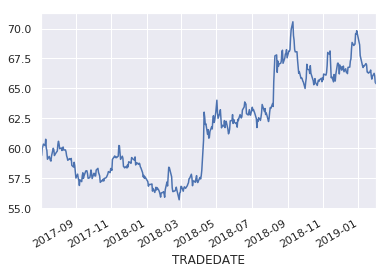

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

moex.plot();

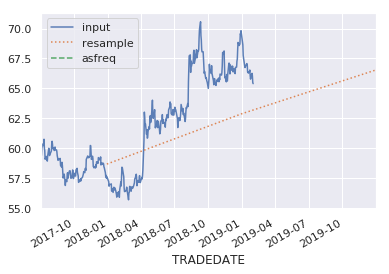

In [ ]:
moex.plot(alpha=0.9, style='-')
moex.resample('BA').mean().plot(style=':')
moex.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'], loc='upper left');

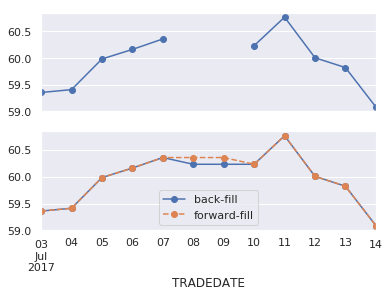

In [ ]:
fig, ax = plt.subplots(2, sharex=True)
data = moex.iloc[:10]
data.asfreq('D').plot(ax=ax[0], marker='o')
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

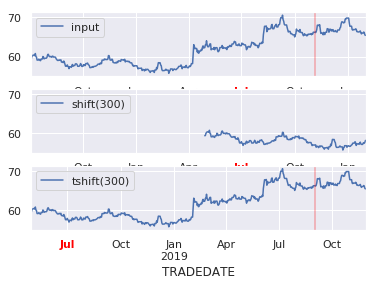

In [ ]:
fig, ax = plt.subplots(3, sharey=True)
# apply a frequency to the data
moex = moex.asfreq('D', method='pad')
moex.plot(ax=ax[0])
moex.shift(300).plot(ax=ax[1])
moex.tshift(300).plot(ax=ax[2])
# legends and annotations
local_max = pd.to_datetime('2018-11-05')
offset = pd.Timedelta(300, 'D')
ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')
ax[1].legend(['shift(300)'], loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')
ax[2].legend(['tshift(300)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

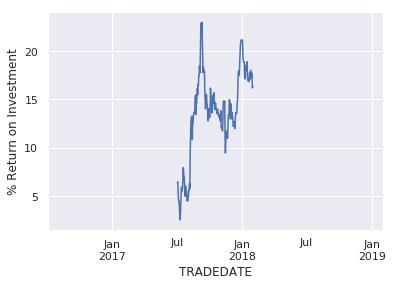

In [ ]:
ROI = 100 * (moex.tshift(-365) / moex - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

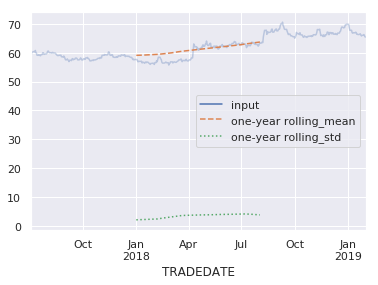

In [ ]:
rolling = moex.rolling(365, center=True)
data = pd.DataFrame({'input': moex, 'one-year rolling_mean': rolling.mean(), 'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

#High-Performance Pandas: eval() and query()

##Motivating query() and eval(): Compound Expressions

In [ ]:
import numpy as np
rng = np.random.RandomState(42)
x = rng.rand(10**6)
y = rng.rand(10**6)
%timeit x + y

100 loops, best of 3: 2.71 ms per loop


In [ ]:
%timeit np.fromiter((xi + yi for xi, yi in zip(x, y)), dtype=x.dtype, count=len(x))

1 loop, best of 3: 380 ms per loop


In [ ]:
# every intermediate step is explicitly allocated in memory!
%timeit (x > 0.5) & (y < 0.5)

100 loops, best of 3: 2.19 ms per loop


In [ ]:
tmp1 = (x > 0.5)
tmp2 = (y < 0.5)

%timeit tmp1 & tmp2

1000 loops, best of 3: 204 µs per loop


In [ ]:
mask = (x > 0.5) & (y < 0.5)

import numexpr
mask_numexpr = numexpr.evaluate('(x > 0.5) & (y < 0.5)')
np.allclose(mask, mask_numexpr)

True

In [ ]:
%timeit numexpr.evaluate('(x > 0.5) & (y < 0.5)')

100 loops, best of 3: 5.99 ms per loop


##pandas.eval() for Efficient Operations

In [ ]:
import pandas as pd
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols)) for i in range(4))

In [ ]:
%timeit df1 + df2 + df3 + df4

1 loop, best of 3: 82 ms per loop


In [ ]:
%timeit pd.eval('df1 + df2 + df3 + df4')

10 loops, best of 3: 50 ms per loop


In [ ]:
np.allclose(df1 + df2 + df3 + df4, pd.eval('df1 + df2 + df3 + df4'))

True

In [ ]:
# Arithmetic operators
df1, df2, df3, df4, df5 = (pd.DataFrame(rng.randint(0, 1000, (100, 3))) for i in range(5))
result1 = -df1 * df2 / (df3 + df4) - df5
result2 = pd.eval('-df1 * df2 / (df3 + df4) - df5')
np.allclose(result1, result2)

True

In [ ]:
# Comparison operators
result1 = (df1 < df2) & (df2 <= df3) & (df3 != df4)
result2 = pd.eval('df1 < df2 <= df3 != df4')
np.allclose(result1, result2)

True

In [ ]:
# Bitwise operators
result1 = (df1 < 0.5) & (df2 < 0.5) | (df3 < df4)
result2 = pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)')
np.allclose(result1, result2)

True

In [ ]:
result3 = pd.eval('(df1 < 0.5) and (df2 < 0.5) or (df3 < df4)')
np.allclose(result1, result3)

True

In [ ]:
# Object attributes and indices
result1 = df2.T[0] + df3.iloc[1]
result2 = pd.eval('df2.T[0] + df3.iloc[1]')
np.allclose(result1, result2)

True

##DataFrame.eval() for Column-Wise Operations

In [ ]:
import pandas as pd
import numpy as np

rng = np.random.RandomState(0)
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])
df.head()

,A,B,C
0,0.548814,0.715189,0.602763
1,0.544883,0.423655,0.645894
2,0.437587,0.891773,0.963663
3,0.383442,0.791725,0.528895
4,0.568045,0.925597,0.071036


In [ ]:
result1 = (df['A'] + df['B']) / (df['C'] - 1)
result2 = pd.eval("(df.A + df.B) / (df.C - 1)")
np.allclose(result1, result2)

True

In [ ]:
result3 = df.eval('(A + B) / (C - 1)')
np.allclose(result1, result3)

True

In [ ]:
df.head()

,A,B,C
0,0.548814,0.715189,0.602763
1,0.544883,0.423655,0.645894
2,0.437587,0.891773,0.963663
3,0.383442,0.791725,0.528895
4,0.568045,0.925597,0.071036


In [ ]:
# new column added
df.eval('D = (A + B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.548814,0.715189,0.602763,2.097013
1,0.544883,0.423655,0.645894,1.499531
2,0.437587,0.891773,0.963663,1.379487
3,0.383442,0.791725,0.528895,2.221928
4,0.568045,0.925597,0.071036,21.026521


In [ ]:
# column D modified
df.eval('D = (A - B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.548814,0.715189,0.602763,-0.276022
1,0.544883,0.423655,0.645894,0.187691
2,0.437587,0.891773,0.963663,-0.471312
3,0.383442,0.791725,0.528895,-0.771956
4,0.568045,0.925597,0.071036,-5.033388


In [ ]:
# work with local Python variables
column_mean = df.mean(1)
result1 = df['A'] + column_mean
result2 = df.eval('A + @column_mean')
np.allclose(result1, result2)
# NOTE: @ works only for DataFrame.eval(), not pandas.eval() !

True

##DataFrame.query() Method

In [ ]:
result1 = df[(df.A < 0.5) & (df.B < 0.5)]
result2 = pd.eval('df[(df.A < 0.5) & (df.B < 0.5)]')
np.allclose(result1, result2)

True

In [ ]:
# NOTE: cannot be expressed through DataFrame.eval()
#       but DataFrame.query() saves the day
result2 = df.query('A < 0.5 and B < 0.5')
np.allclose(result1, result2)

True

In [ ]:
Cmean = df['C'].mean()
result1 = df[(df.A < Cmean) & (df.B < Cmean)]
result2 = df.query('A < @Cmean and B < @Cmean')
np.allclose(result1, result2)

True

##Performance: When to Use These Functions

In [ ]:
# LARGE DataFrames - use eval()
# small DataFrames - use traditional syntax
# LARGE or small in terms of L1/L2 cache size and size of tmp objects
# check size as
df.values.nbytes

32000